In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
shoesales = pd.read_csv('Shoesales.csv',parse_dates = ['YearMonth'],index_col = ["YearMonth"])
shoesales.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [3]:
shoesales.describe().T

,count,mean,std,min,25%,50%,75%,max
Shoe_Sales,187.0,245.636364,121.390804,85.0,143.5,220.0,315.5,662.0


In [4]:
from pylab import rcParams

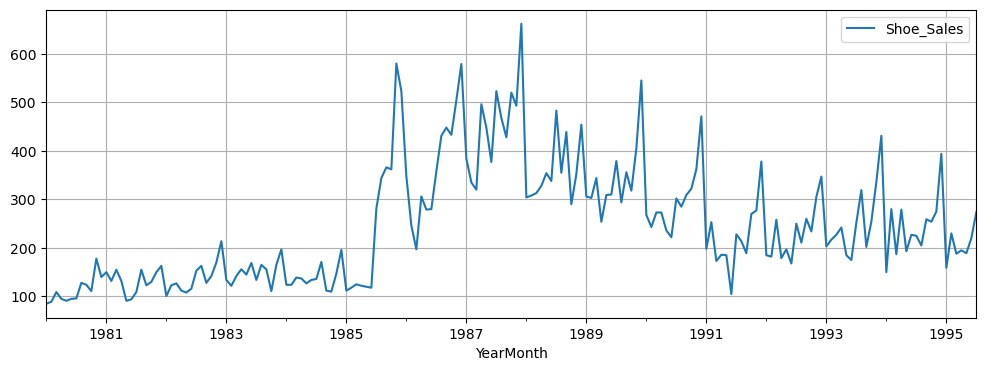

In [5]:
rcParams['figure.figsize'] = 12,4
shoesales.plot();
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition with respect to month

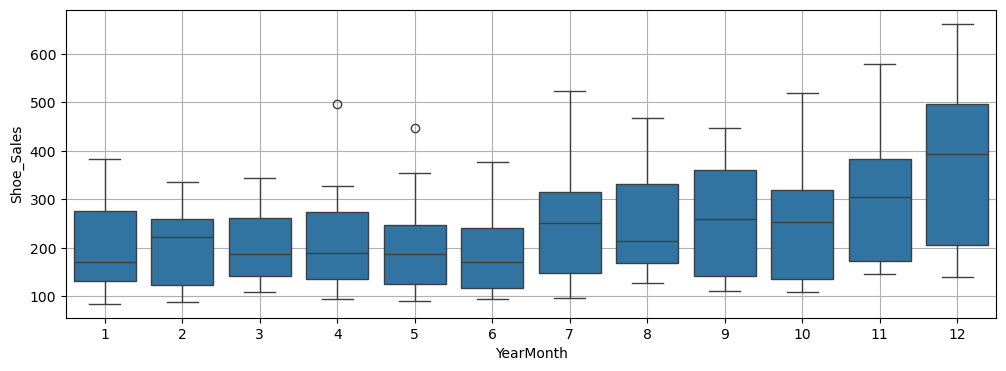

In [6]:
sns.boxplot(x=shoesales.index.month,y=shoesales["Shoe_Sales"])
plt.grid();

# With respect to months across years

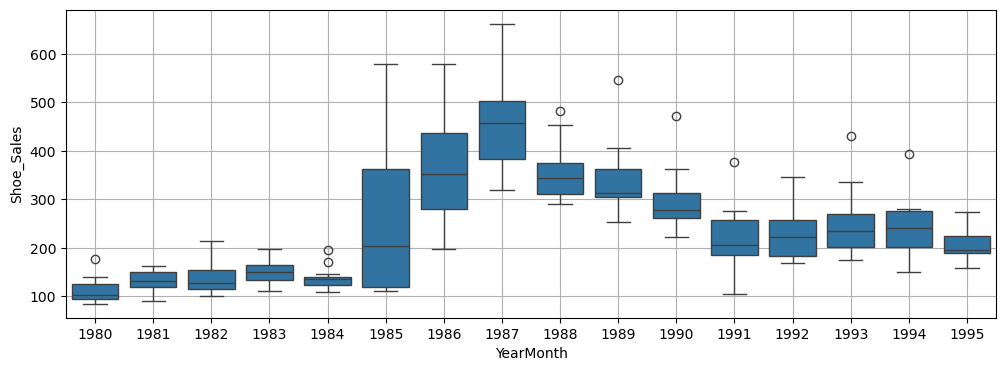

In [7]:
sns.boxplot(x=shoesales.index.year,y=shoesales["Shoe_Sales"])
plt.grid();

# Pivot Table

# Plot a graph of monthly shoesales production in parts per million across years

In [8]:
monthly_shoesales_across_years = pd.pivot_table(shoesales, values = 'Shoe_Sales', columns = shoesales.index.month_name(), index = shoesales.index.year)
monthly_shoesales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,95.0,128.0,140.0,89.0,85.0,96.0,95.0,109.0,91.0,178.0,111.0,124.0
1981,132.0,155.0,163.0,132.0,150.0,109.0,94.0,155.0,91.0,150.0,130.0,123.0
1982,112.0,163.0,214.0,123.0,101.0,153.0,116.0,127.0,108.0,170.0,142.0,128.0
1983,156.0,165.0,197.0,122.0,134.0,134.0,169.0,142.0,145.0,165.0,111.0,156.0
1984,137.0,171.0,196.0,124.0,124.0,136.0,134.0,139.0,127.0,147.0,110.0,112.0
1985,122.0,344.0,523.0,118.0,112.0,281.0,118.0,125.0,120.0,580.0,362.0,366.0
1986,306.0,431.0,579.0,246.0,348.0,358.0,280.0,197.0,279.0,504.0,433.0,448.0
1987,496.0,468.0,662.0,335.0,384.0,523.0,377.0,320.0,448.0,493.0,520.0,428.0
1988,328.0,355.0,454.0,308.0,304.0,483.0,338.0,313.0,354.0,352.0,290.0,439.0


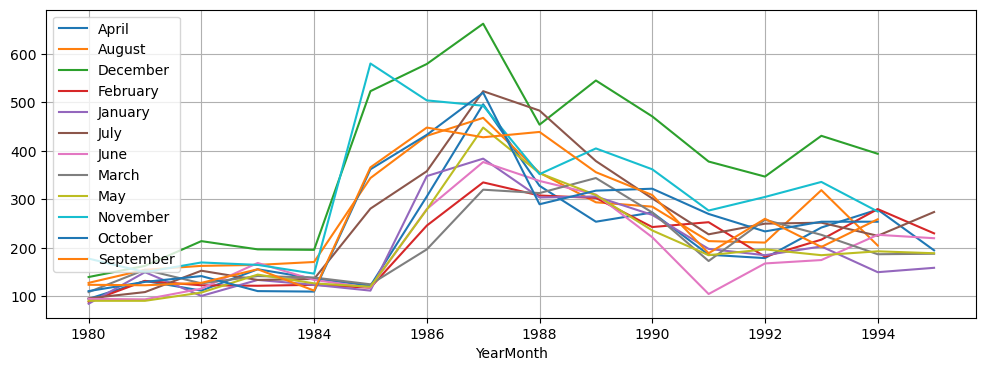

In [9]:
monthly_shoesales_across_years.plot()
plt.grid()
plt.legend(loc='best');

<Axes: >

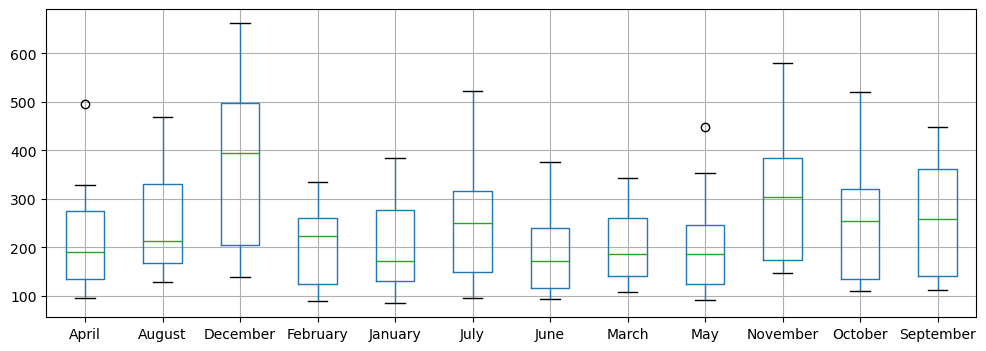

In [10]:
monthly_shoesales_across_years.boxplot()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

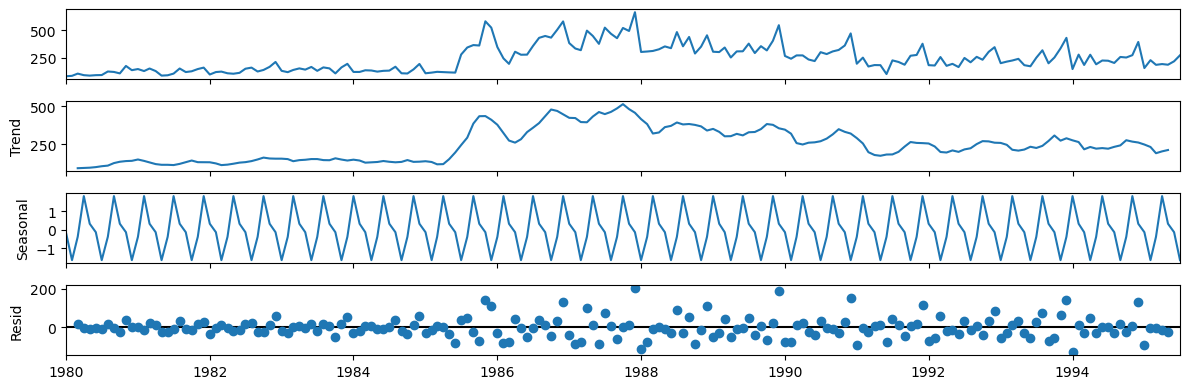

In [12]:
decomposition_add = seasonal_decompose(shoesales,model='additive',period=5)
decomposition_add.plot();

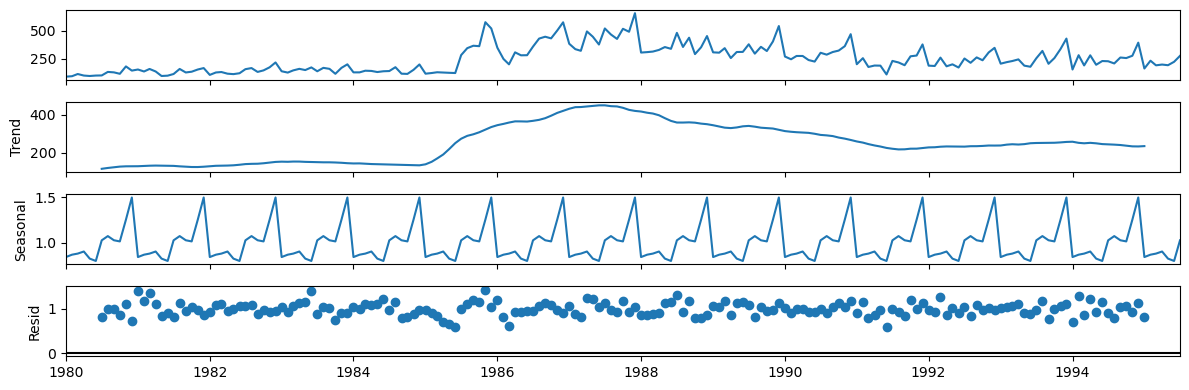

In [13]:
decomposition = seasonal_decompose(shoesales,model='multiplicative')
decomposition.plot();

# The Multiplicative terms is gives a pattern for softdrink production. so the series is multiplicative

In [14]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    114.46
1980-08-01    118.96
1980-09-01    122.67
1980-10-01    126.12
1980-11-01    127.67
1980-12-01    127.62
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.84
1980-02-01    0.87
1980-03-01    0.88
1980-04-01    0.90
1980-05-01    0.82
1980-06-01    0.80
1980-07-01    1.03
1980-08-01    1.07
1980-09-01    1.03
1980-10-01    1.01
1980-11-01    1.25
1980-12-01    1.50
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    0.82
1980-08-01    1.00
1980-09-01    0.98
1980-10-01    0.87
1980-11-01    1.11
1980-12-01    0.73
Name: resid, dtype: float64 



# 3. Split the data into training and test. The test data should start in 1991.

In [15]:
train = shoesales[shoesales.index <= '1990-12-01']
test = shoesales[shoesales.index > '1990-12-01']

In [16]:
train.shape

(132, 1)

In [17]:
test.shape

(55, 1)

In [18]:
print(train,'\n')
print(test)

            Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
...                ...
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

[132 rows x 1 columns] 

            Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
1991-07-01         228
1991-08-01         214
1991-09-01         189
1991-10-01         270
1991-11-01         277
1991-12-01         378
1992-01-01         185
1992-02-01         182
1992-03-01         258
1992-04-01         179
1992-05-01         197
1992-06-01         168
1992-07-01         250
1992-08-01         211
1992-09-01         260
1992-10-01         234
1992-11-01         305
1992-12-01         347
1993-01-01         203
1993-02-01         217
1993-03-01         227
1993-04-

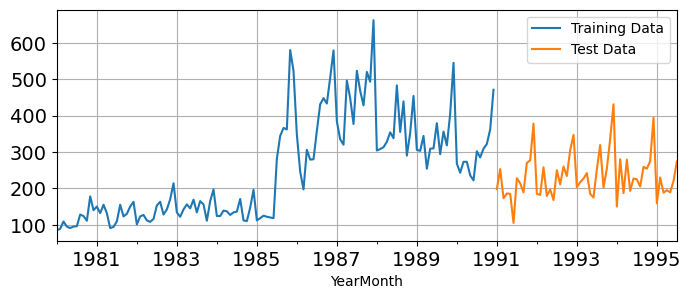

In [19]:
train['Shoe_Sales'].plot(figsize=(8,3), fontsize=14)
test['Shoe_Sales'].plot(figsize=(8,3), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [20]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [21]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [22]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132 

First few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187 



In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

In [26]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# Evaluate this model on the test data using RMSE

In [27]:
from sklearn import metrics

## Test Data - RMSE

linear_shoesales_rmse = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(linear_shoesales_rmse))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [28]:
resultsDf = pd.DataFrame({'Test RMSE': [linear_shoesales_rmse]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,266.276472


# Simple Exponential Model

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [30]:
SES_train = train.copy()
SES_test = test.copy()

In [31]:
shoesales_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
shoesales_SES_autofit = shoesales_SES.fit(optimized=True,use_brute=True)

In [33]:
shoesales_SES_autofit.params

{'smoothing_level': 0.6051903749099211,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
test_predictions_shoesales = shoesales_SES_autofit.forecast(steps=len(test))
test_predictions_shoesales

1991-01-01    420.251632
1991-02-01    420.251632
1991-03-01    420.251632
1991-04-01    420.251632
1991-05-01    420.251632
1991-06-01    420.251632
1991-07-01    420.251632
1991-08-01    420.251632
1991-09-01    420.251632
1991-10-01    420.251632
1991-11-01    420.251632
1991-12-01    420.251632
1992-01-01    420.251632
1992-02-01    420.251632
1992-03-01    420.251632
1992-04-01    420.251632
1992-05-01    420.251632
1992-06-01    420.251632
1992-07-01    420.251632
1992-08-01    420.251632
1992-09-01    420.251632
1992-10-01    420.251632
1992-11-01    420.251632
1992-12-01    420.251632
1993-01-01    420.251632
1993-02-01    420.251632
1993-03-01    420.251632
1993-04-01    420.251632
1993-05-01    420.251632
1993-06-01    420.251632
1993-07-01    420.251632
1993-08-01    420.251632
1993-09-01    420.251632
1993-10-01    420.251632
1993-11-01    420.251632
1993-12-01    420.251632
1994-01-01    420.251632
1994-02-01    420.251632
1994-03-01    420.251632
1994-04-01    420.251632


In [35]:
## Test Data - RMSE

rmse_shoesales_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_shoesales,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_shoesales_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 196.426


In [44]:
temp_resultsDf_shoesales = pd.DataFrame({'Test RMSE': [rmse_shoesales_test]}
                              ,index=['Alpha=0.995:SimpleExponentialSmoothing'])

resultsDf_ses_shoesales = pd.concat([resultsDf, temp_resultsDf_shoesales])
resultsDf_ses_shoesales

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.425508


# Double Exponential Smoothing

In [36]:
DES_train_rose = train.copy()
DES_test_rose = test.copy()

In [37]:
shoesales_DES = Holt(SES_train['Shoe_Sales'])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
shoesales_DES_autofit = shoesales_DES.fit(optimized=True,use_brute=True)

In [39]:
shoesales_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.603381,True
smoothing_trend,beta,0.000099,True
initial_level,l.0,85.000000,False
initial_trend,b.0,4.000000,False


In [40]:
test_predictions_shoesales_de = shoesales_DES_autofit.forecast(steps=len(test))
test_predictions_shoesales_de

1991-01-01    426.564783
1991-02-01    430.546010
1991-03-01    434.527238
1991-04-01    438.508465
1991-05-01    442.489692
1991-06-01    446.470919
1991-07-01    450.452147
1991-08-01    454.433374
1991-09-01    458.414601
1991-10-01    462.395828
1991-11-01    466.377056
1991-12-01    470.358283
1992-01-01    474.339510
1992-02-01    478.320738
1992-03-01    482.301965
1992-04-01    486.283192
1992-05-01    490.264419
1992-06-01    494.245647
1992-07-01    498.226874
1992-08-01    502.208101
1992-09-01    506.189328
1992-10-01    510.170556
1992-11-01    514.151783
1992-12-01    518.133010
1993-01-01    522.114238
1993-02-01    526.095465
1993-03-01    530.076692
1993-04-01    534.057919
1993-05-01    538.039147
1993-06-01    542.020374
1993-07-01    546.001601
1993-08-01    549.982828
1993-09-01    553.964056
1993-10-01    557.945283
1993-11-01    561.926510
1993-12-01    565.907738
1994-01-01    569.888965
1994-02-01    573.870192
1994-03-01    577.851419
1994-04-01    581.832647


In [41]:
## Test Data - RMSE

rmse_de_test_shoesales = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_shoesales_de,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_de_test_shoesales))

For RegressionOnTime forecast on the Test Data,  RMSE is 311.020


In [45]:
temp_resultsDf_des_shoesales = pd.DataFrame({'Test RMSE': [rmse_de_test_shoesales]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf_des_shoesales = pd.concat([resultsDf_ses_shoesales, temp_resultsDf_des_shoesales])
resultsDf_des_shoesales

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.425508
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",311.020473


# Triple exponential Smoothing

In [46]:
TES_train_rose = train.copy()
TES_test_rose = test.copy()

In [47]:
model_TES_shoesales = ExponentialSmoothing(SES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative')

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
model_TES_shoesales_autofit=model_TES_shoesales.fit(optimized=True,use_brute=True)

In [50]:
model_TES_shoesales_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.571129,True
smoothing_trend,beta,0.000148,True
smoothing_seasonal,gamma,0.202947,True
initial_level,l.0,116.355292,True
initial_trend,b.0,0.112199,True
initial_seasons.0,s.0,1.056793,True
initial_seasons.1,s.1,1.011303,True
initial_seasons.2,s.2,1.233747,True
initial_seasons.3,s.3,1.406631,True
initial_seasons.4,s.4,1.321627,True


In [51]:
test_predictions_shoesales_te = model_TES_shoesales_autofit.forecast(steps=len(test))
test_predictions_shoesales_te

1991-01-01    261.342543
1991-02-01    243.085370
1991-03-01    256.996702
1991-04-01    270.198135
1991-05-01    267.375606
1991-06-01    256.946321
1991-07-01    339.585163
1991-08-01    315.726553
1991-09-01    340.179286
1991-10-01    314.977543
1991-11-01    376.103895
1991-12-01    466.476288
1992-01-01    263.151144
1992-02-01    244.766655
1992-03-01    258.773180
1992-04-01    272.064791
1992-05-01    269.221701
1992-06-01    258.719386
1992-07-01    341.927133
1992-08-01    317.902729
1992-09-01    342.522659
1992-10-01    317.146066
1992-11-01    378.691770
1992-12-01    469.684153
1993-01-01    264.959745
1993-02-01    246.447939
1993-03-01    260.549657
1993-04-01    273.931448
1993-05-01    271.067795
1993-06-01    260.492451
1993-07-01    344.269103
1993-08-01    320.078906
1993-09-01    344.866033
1993-10-01    319.314589
1993-11-01    381.279644
1993-12-01    472.892017
1994-01-01    266.768347
1994-02-01    248.129224
1994-03-01    262.326135
1994-04-01    275.798104


In [53]:
## Test Data - RMSE

rmse_te_test_shoesales = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_shoesales_te,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_te_test_shoesales))

For RegressionOnTime forecast on the Test Data,  RMSE is 83.734


In [54]:
temp_resultsDf_shoesales_whole = pd.DataFrame({'Test RMSE': [rmse_te_test_shoesales]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing'])

resultsDf_te_shoesales = pd.concat([resultsDf_des_shoesales, temp_resultsDf_shoesales_whole])
resultsDf_te_shoesales

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.425508
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",311.020473
"Alpha=0.99,Beta=0.0001,Gamma=0.005:TripleExponentialSmoothing",83.734048


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [55]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

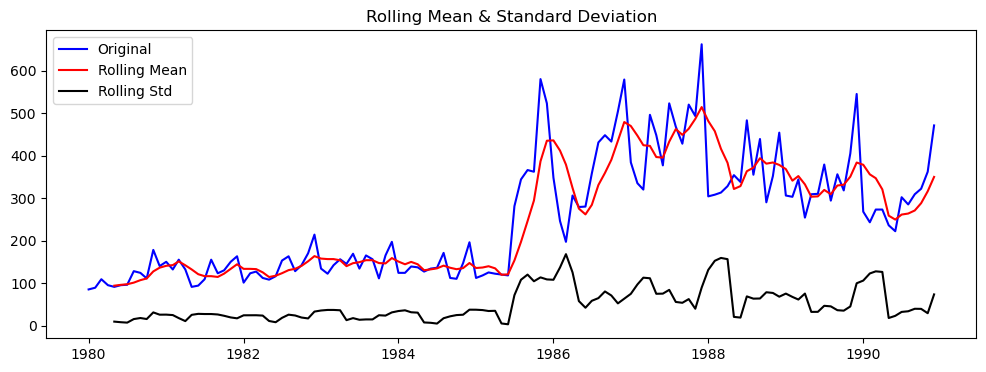

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [56]:
test_stationarity(train['Shoe_Sales'])

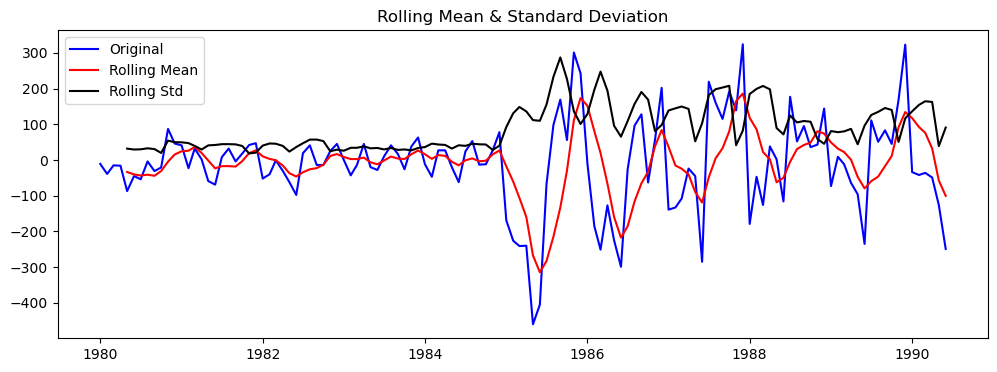

Results of Dickey-Fuller Test:
Test Statistic                  -3.002191
p-value                          0.034690
#Lags Used                       8.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [58]:
train_diff = train.diff(periods=-6)
train_stat_shoesales = train_diff.dropna()
test_stationarity(train_stat_shoesales)

# Arima Models

In [ ]:
# p (0, 1)
# q (0, 1)
# x = [(0, 0), (1, 0), (0, 1), (1, 1)]

In [59]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


In [60]:
# Creating an empty Dataframe with column names only
dfObj_shoesales = pd.DataFrame(columns=['param', 'AIC'])
dfObj_shoesales

,param,AIC


In [64]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_stat_shoesales['Shoe_Sales'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3817853575.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)
C:\Users\admin\AppDa

ARIMA(0, 0, 0) - AIC:1580.4530445692621
ARIMA(0, 0, 1) - AIC:1555.9023808241682
ARIMA(0, 0, 2) - AIC:1536.7321615029189
ARIMA(1, 0, 0) - AIC:1550.605707579184
ARIMA(1, 0, 1) - AIC:1552.6056906296355


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3817853575.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppDa

ARIMA(1, 0, 2) - AIC:1557.8426395477218
ARIMA(2, 0, 0) - AIC:1552.6056129386272


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3817853575.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppDa

ARIMA(2, 0, 1) - AIC:1541.1428210353804


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3817853575.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppDa

ARIMA(2, 0, 2) - AIC:1531.21898332433


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3817853575.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj_shoesales = dfObj_shoesales.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)


In [65]:
dfObj_shoesales.sort_values(by=['AIC'])

,param,AIC
8,"(2, 0, 2)",1531.218983
2,"(0, 0, 2)",1536.732162
7,"(2, 0, 1)",1541.142821
3,"(1, 0, 0)",1550.605708
6,"(2, 0, 0)",1552.605613
4,"(1, 0, 1)",1552.605691
1,"(0, 0, 1)",1555.902381
5,"(1, 0, 2)",1557.842640
0,"(0, 0, 0)",1580.453045


In [66]:
#(2,0,2) is the lowest akaike value
mod_shoesales = ARIMA(train_stat_shoesales['Shoe_Sales'], order=(2,0,2))

results_Arima_shoesales = mod_shoesales.fit()

print(results_Arima_shoesales.summary())

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\AppData\Roaming\Python\Python310\site-pa

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  126
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -759.609
Date:                Wed, 17 Apr 2024   AIC                           1531.219
Time:                        19:36:32   BIC                           1548.237
Sample:                    01-01-1980   HQIC                          1538.133
                         - 06-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.0157     12.908     -0.853      0.393     -36.315      14.283
ar.L1          1.6350      0.049     33.120      0.000       1.538       1.732
ar.L2         -0.9188      0.041    -22.398      0.0

In [67]:
final_hat_avg =test.copy()
pred_ARIMA_shoesales = results_Arima_shoesales.forecast(steps=len(test))
pred_ARIMA_shoesales

1990-07-01   -106.141591
1990-08-01    -63.929690
1990-09-01    -10.127526
1990-10-01     39.053174
1990-11-01     70.028957
1990-12-01     75.486539
1991-01-01     55.949293
1991-02-01     18.992276
1991-03-01    -23.480455
1991-04-01    -58.966085
1991-05-01    -77.960299
1991-06-01    -76.411338
1991-07-01    -56.427186
1991-08-01    -25.177023
1991-09-01      7.554605
1991-10-01     32.357292
1991-11-01     42.835311
1991-12-01     37.178057
1992-01-01     18.301580
1992-02-01     -7.362925
1992-03-01    -31.979931
1992-04-01    -48.647559
1992-05-01    -53.280680
1992-06-01    -45.541639
1992-07-01    -28.631743
1992-08-01     -8.095243
1992-09-01      9.944540
1992-10-01     20.570208
1992-11-01     21.368030
1992-12-01     12.909702
1993-01-01     -1.652375
1993-02-01    -17.689405
1993-03-01    -30.529876
1993-04-01    -36.788924
1993-05-01    -35.224557
1993-06-01    -26.916136
1993-07-01    -14.769506
1993-08-01     -2.543905
1993-09-01      6.284308
1993-10-01      9.485362


In [68]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_shoesales = sqrt(mean_squared_error(test.Shoe_Sales,pred_ARIMA_shoesales))
print(rmse_shoesales)

257.89170476947953


In [70]:
resultsDf_shoesales_rmse = pd.DataFrame({'Test RMSE': rmse_shoesales}
                           ,index=['ARIMA(2, 0, 2)'])

resultsDf_shoesales_rmse

,Test RMSE
"ARIMA(2, 0, 2)",257.891705


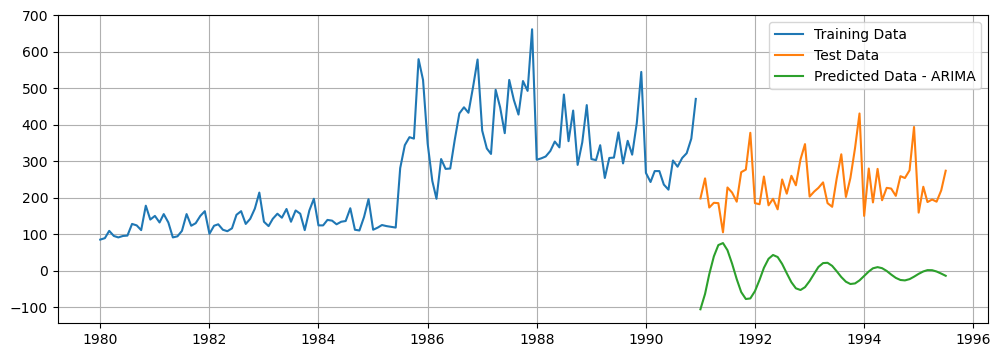

In [71]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA_shoesales,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Let's build the model with SARIMA

In [72]:
dfObj2_shoesales= pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2_shoesales

,param,seasonal,AIC


In [74]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod_shoesales = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA_shoesales = mod_shoesales.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_shoesales.aic))
        dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1856.6762692705802
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1698.8646025849866
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1582.8960614976515
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1564.7367401155961
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1526.3718294832838


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1470.3783934638186
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1482.4893443002602
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1481.4453160722285


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1471.7911163500044
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1711.8813189517869


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1591.3221174907737
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1505.2981691950927


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1518.7229372211818
SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1471.3890154988592


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1419.2174509706024
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1445.4240151085878


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1440.7307277393318


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1420.1506326865797
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1632.0207063933221


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1515.0197179175143


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1455.3024386567797
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1505.2934771179837


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1451.7974367362795


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1399.1402966785797
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1440.8782022369746


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1445.6453507412434


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be

SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1398.4491387423448
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1509.0791612561102
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1455.1916620923887
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1400.4688970976424
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1456.1831699378718


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1455.8980827870812


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1402.4433254024923
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1400.9811864721228


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1402.2150543247556


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1399.0583059738915
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1488.5369501987398


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1438.264709385443


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1384.3276331219713
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1448.750322662672


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1440.1727777749045


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1386.3222636066405
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1394.4252827258927


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1396.3787145133858


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1381.265294943492
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1476.1111290265285


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init

SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1425.8242209040175
SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1374.3119479704274


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1446.9484338175243
SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1427.7896945962138


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1376.2593890400556
SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1395.3637952148133


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1397.2555132916448


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1374.005736610021
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1492.6809473249873
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1452.235745835419
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1396.319950434208
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1441.980032246225


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1442.9509478639518


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1398.2737554417054
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1384.7967389116238


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1386.7073417896568


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1379.5520124010973
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1484.9033977911622
SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1433.7704654880913


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1381.3144775868743
SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1434.085150861602


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1435.060837247601
SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1383.2253911748098


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1381.4489407134624


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1383.0798938027801


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1384.9919454933242
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1476.6019094559697
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1425.365484574143


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1372.8894341417383
SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1436.1639944543842


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1426.8287743161216
SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1374.8086429811638


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1383.4115557381506


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1385.056264578207


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1376.3955088985376


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\3479635186.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj2_shoesales = dfObj2_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoesales.aic}, ignore_index=True)


In [75]:
dfObj2_shoesales.sort_values(by=['AIC'])

,param,seasonal,AIC
74,"(2, 0, 2)","(0, 0, 2, 5)",1372.889434
53,"(1, 0, 2)","(2, 0, 2, 5)",1374.005737
47,"(1, 0, 2)","(0, 0, 2, 5)",1374.311948
77,"(2, 0, 2)","(1, 0, 2, 5)",1374.808643
50,"(1, 0, 2)","(1, 0, 2, 5)",1376.259389
...,...,...,...
10,"(0, 0, 1)","(0, 0, 1, 5)",1591.322117
18,"(0, 0, 2)","(0, 0, 0, 5)",1632.020706
1,"(0, 0, 0)","(0, 0, 1, 5)",1698.864603
9,"(0, 0, 1)","(0, 0, 0, 5)",1711.881319


In [76]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:1129.871806
mod = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_shoesales = mod.fit()
print(results_shoesales.summary())

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -681.156
Date:                           Thu, 18 Apr 2024   AIC                           1374.312
Time:                                   09:55:11   BIC                           1390.987
Sample:                               01-01-1980   HQIC                          1381.083
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0009      0.010    103.024      0.000       0.982       1.020
ma.L1         -0.3722      0.087     -4.288

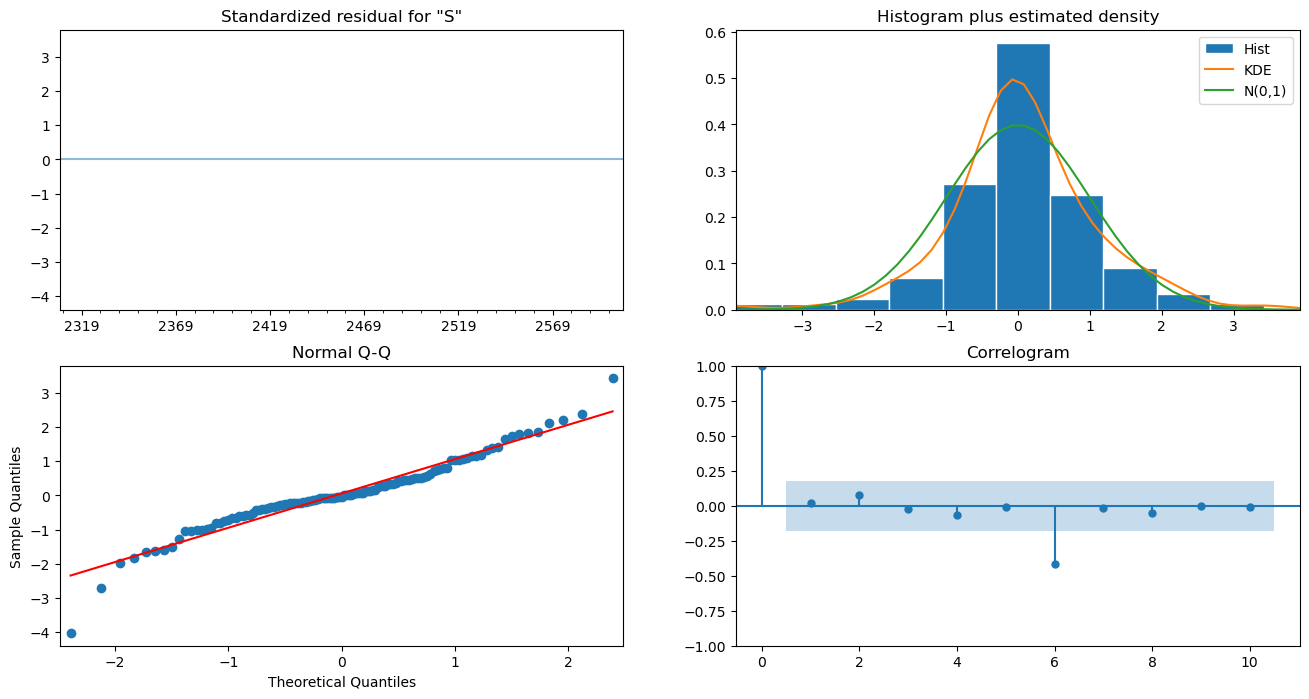

In [77]:
results_shoesales.plot_diagnostics(figsize=(16, 8))
plt.show()

In [101]:
final_hat_avg =test.copy()
pred_SARIMA_shoesales = results_shoesales.get_forecast(steps=len(test))
pred_SARIMA_shoesales.predicted_mean

1991-01-01    413.555956
1991-02-01    389.986686
1991-03-01    392.831815
1991-04-01    394.753675
1991-05-01    389.282127
1991-06-01    390.837270
1991-07-01    388.887259
1991-08-01    387.503447
1991-09-01    386.395148
1991-10-01    378.868325
1991-11-01    383.297136
1991-12-01    385.424929
1992-01-01    385.761340
1992-02-01    386.098046
1992-03-01    386.435045
1992-04-01    386.772339
1992-05-01    387.109927
1992-06-01    387.447809
1992-07-01    387.785987
1992-08-01    388.124460
1992-09-01    388.463228
1992-10-01    388.802292
1992-11-01    389.141651
1992-12-01    389.481307
1993-01-01    389.821260
1993-02-01    390.161509
1993-03-01    390.502055
1993-04-01    390.842899
1993-05-01    391.184039
1993-06-01    391.525478
1993-07-01    391.867215
1993-08-01    392.209250
1993-09-01    392.551583
1993-10-01    392.894215
1993-11-01    393.237147
1993-12-01    393.580377
1994-01-01    393.923908
1994-02-01    394.267738
1994-03-01    394.611868
1994-04-01    394.956298


In [79]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Shoe_Sales,pred_SARIMA.predicted_mean))
print(rmse)

170.32583842562238


In [81]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2, 5)'])

resultsDf = pd.concat([resultsDf_shoesales_rmse, resultsDf_temp])
resultsDf

,Test RMSE
"ARIMA(2, 0, 2)",257.891705
"SARIMA(1, 0, 2)(0, 0, 2, 5)",170.325838


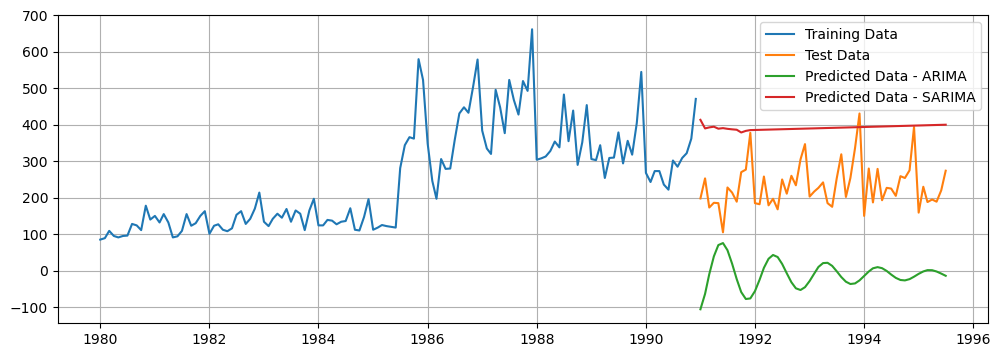

In [82]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA_shoesales,label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Build a SARIMAX model

In [83]:
### Let's create exogeneous variables

ex_train=train[['Shoe_Sales']]
ex_test=test[['Shoe_Sales']]
ex_train.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


In [96]:
dfObj3_shoesales = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3_shoesales

,param,seasonal,AIC


In [97]:
## Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SAR

SARIMA(0, 0, 0)(0, 0, 0, 5) - AIC:-2771.624576122576
SARIMA(0, 0, 0)(0, 0, 1, 5) - AIC:-2663.6847068049206


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 0)(0, 0, 2, 5) - AIC:-2555.7448374872647
SARIMA(0, 0, 0)(1, 0, 0, 5) - AIC:-2684.8726806684517
SARIMA(0, 0, 0)(1, 0, 1, 5) - AIC:-2661.6847068049206


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 0)(1, 0, 2, 5) - AIC:-2553.7448374872647
SARIMA(0, 0, 0)(2, 0, 0, 5) - AIC:-2576.932811350796


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 0)(2, 0, 1, 5) - AIC:-2574.932811350796
SARIMA(0, 0, 0)(2, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(0, 0, 1)(0, 0, 0, 5) - AIC:-2748.436602259045
SARIMA(0, 0, 1)(0, 0, 1, 5) - AIC:-2640.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 1)(0, 0, 2, 5) - AIC:-2532.5568636237335
SARIMA(0, 0, 1)(1, 0, 0, 5) - AIC:-2682.8726806684517


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(0, 0, 1)(1, 0, 1, 5) - AIC:-2638.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 1)(1, 0, 2, 5) - AIC:-2530.5568636237335
SARIMA(0, 0, 1)(2, 0, 0, 5) - AIC:-2574.932811350796


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 1)(2, 0, 1, 5) - AIC:-2572.932811350796
SARIMA(0, 0, 1)(2, 0, 2, 5) - AIC:-2528.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 2)(0, 0, 0, 5) - AIC:-2725.2486283955136
SARIMA(0, 0, 2)(0, 0, 1, 5) - AIC:-2617.308759077858


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 2)(0, 0, 2, 5) - AIC:-2509.368889760203
SARIMA(0, 0, 2)(1, 0, 0, 5) - AIC:-2680.8726806684517


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 2)(1, 0, 1, 5) - AIC:-2615.308759077858
SARIMA(0, 0, 2)(1, 0, 2, 5) - AIC:-2507.368889760203
SARIMA(0, 0, 2)(2, 0, 0, 5) - AIC:-2572.932811350796


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(0, 0, 2)(2, 0, 1, 5) - AIC:-2570.932811350796


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(0, 0, 2)(2, 0, 2, 5) - AIC:-2505.368889760203
SARIMA(1, 0, 0)(0, 0, 0, 5) - AIC:-2769.624576122576
SARIMA(1, 0, 0)(0, 0, 1, 5) - AIC:-2661.6847068049206


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 0)(0, 0, 2, 5) - AIC:-2553.7448374872647
SARIMA(1, 0, 0)(1, 0, 0, 5) - AIC:-2661.6847068049206


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 0)(1, 0, 1, 5) - AIC:-2659.6847068049206
SARIMA(1, 0, 0)(1, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 0)(2, 0, 0, 5) - AIC:-2553.7448374872647
SARIMA(1, 0, 0)(2, 0, 1, 5) - AIC:-2551.7448374872647


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(1, 0, 0)(2, 0, 2, 5) - AIC:-2549.7448374872647
SARIMA(1, 0, 1)(0, 0, 0, 5) - AIC:-2746.436602259045


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 1)(0, 0, 1, 5) - AIC:-2638.4967329413894
SARIMA(1, 0, 1)(0, 0, 2, 5) - AIC:-2530.5568636237335


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(1, 0, 1)(1, 0, 0, 5) - AIC:-2659.6847068049206
SARIMA(1, 0, 1)(1, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 1)(1, 0, 2, 5) - AIC:-2528.5568636237335
SARIMA(1, 0, 1)(2, 0, 0, 5) - AIC:-2551.7448374872647
SARIMA(1, 0, 1)(2, 0, 1, 5) - AIC:-2549.7448374872647


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(1, 0, 1)(2, 0, 2, 5) - AIC:-2526.5568636237335
SARIMA(1, 0, 2)(0, 0, 0, 5) - AIC:-2723.2486283955136


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 2)(0, 0, 1, 5) - AIC:-2615.308759077858
SARIMA(1, 0, 2)(0, 0, 2, 5) - AIC:-2507.368889760203


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(1, 0, 2)(1, 0, 0, 5) - AIC:-2657.6847068049206
SARIMA(1, 0, 2)(1, 0, 1, 5) - AIC:-2613.308759077858


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 2)(1, 0, 2, 5) - AIC:-2505.368889760203


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 2)(2, 0, 0, 5) - AIC:-2549.7448374872647


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 2)(2, 0, 1, 5) - AIC:-2547.7448374872647


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(1, 0, 2)(2, 0, 2, 5) - AIC:-2503.368889760203
SARIMA(2, 0, 0)(0, 0, 0, 5) - AIC:-2746.436602259045
SARIMA(2, 0, 0)(0, 0, 1, 5) - AIC:-2659.6847068049206
SARIMA(2, 0, 0)(0, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(2, 0, 0)(1, 0, 0, 5) - AIC:-2638.4967329413894
SARIMA(2, 0, 0)(1, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 0)(1, 0, 2, 5) - AIC:-2549.7448374872647
SARIMA(2, 0, 0)(2, 0, 0, 5) - AIC:-2530.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 0)(2, 0, 1, 5) - AIC:-2528.5568636237335
SARIMA(2, 0, 0)(2, 0, 2, 5) - AIC:-2526.5568636237335


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(2, 0, 1)(0, 0, 0, 5) - AIC:-2744.436602259045
SARIMA(2, 0, 1)(0, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 1)(0, 0, 2, 5) - AIC:-2528.5568636237335
SARIMA(2, 0, 1)(1, 0, 0, 5) - AIC:-2636.4967329413894


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(2, 0, 1)(1, 0, 1, 5) - AIC:-2634.4967329413894


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 1)(1, 0, 2, 5) - AIC:-2526.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 1)(2, 0, 0, 5) - AIC:-2528.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 1)(2, 0, 1, 5) - AIC:-2526.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 1)(2, 0, 2, 5) - AIC:-2524.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(0, 0, 0, 5) - AIC:-2721.2486283955136


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(0, 0, 1, 5) - AIC:-2613.308759077858


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(0, 0, 2, 5) - AIC:-2505.368889760203


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(1, 0, 0, 5) - AIC:-2634.4967329413894
SARIMA(2, 0, 2)(1, 0, 1, 5) - AIC:-2611.308759077858


C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

SARIMA(2, 0, 2)(1, 0, 2, 5) - AIC:-2503.368889760203


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(2, 0, 0, 5) - AIC:-2526.5568636237335


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

SARIMA(2, 0, 2)(2, 0, 1, 5) - AIC:-2524.5568636237335
SARIMA(2, 0, 2)(2, 0, 2, 5) - AIC:-2501.368889760203


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Local\Temp\ipykernel_13024\2033834647.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfObj3_shoesales = dfObj3_shoesales.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


In [98]:
dfObj3_shoesales.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 5)",-2771.624576
27,"(1, 0, 0)","(0, 0, 0, 5)",-2769.624576
9,"(0, 0, 1)","(0, 0, 0, 5)",-2748.436602
36,"(1, 0, 1)","(0, 0, 0, 5)",-2746.436602
54,"(2, 0, 0)","(0, 0, 0, 5)",-2746.436602
...,...,...,...
74,"(2, 0, 2)","(0, 0, 2, 5)",-2505.368890
26,"(0, 0, 2)","(2, 0, 2, 5)",-2505.368890
53,"(1, 0, 2)","(2, 0, 2, 5)",-2503.368890
77,"(2, 0, 2)","(1, 0, 2, 5)",-2503.368890


In [90]:
## SARIMAX(0, 0, 0)(0, 0, 0, 5)
mod = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],exog=ex_train,
                                order=(0,0,0),
                                seasonal_order=(0,0,0,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                        SARIMAX   Log Likelihood                1387.812
Date:                Thu, 18 Apr 2024   AIC                          -2771.625
Time:                        10:06:17   BIC                          -2765.874
Sample:                    01-01-1980   HQIC                         -2769.288
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Shoe_Sales     1.0000         -0       -inf      0.000       1.000       1.000
sigma2          1e-10   1.73e-10      0.578      0.564   -2.39e-10    4.39e-10
Ljung-Box (L1) (Q):                    nan   Jarque-

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: i

In [100]:
pred_SARIMAX_shoesales = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX_shoesales.predicted_mean

1991-01-01    198.0
1991-02-01    253.0
1991-03-01    173.0
1991-04-01    186.0
1991-05-01    185.0
1991-06-01    105.0
1991-07-01    228.0
1991-08-01    214.0
1991-09-01    189.0
1991-10-01    270.0
1991-11-01    277.0
1991-12-01    378.0
1992-01-01    185.0
1992-02-01    182.0
1992-03-01    258.0
1992-04-01    179.0
1992-05-01    197.0
1992-06-01    168.0
1992-07-01    250.0
1992-08-01    211.0
1992-09-01    260.0
1992-10-01    234.0
1992-11-01    305.0
1992-12-01    347.0
1993-01-01    203.0
1993-02-01    217.0
1993-03-01    227.0
1993-04-01    242.0
1993-05-01    185.0
1993-06-01    175.0
1993-07-01    252.0
1993-08-01    319.0
1993-09-01    202.0
1993-10-01    254.0
1993-11-01    336.0
1993-12-01    431.0
1994-01-01    150.0
1994-02-01    280.0
1994-03-01    187.0
1994-04-01    279.0
1994-05-01    193.0
1994-06-01    227.0
1994-07-01    225.0
1994-08-01    205.0
1994-09-01    259.0
1994-10-01    254.0
1994-11-01    275.0
1994-12-01    394.0
1995-01-01    159.0
1995-02-01    230.0


In [92]:
rmse = sqrt(mean_squared_error(test.Shoe_Sales,pred_SARIMAX.predicted_mean))
print(rmse)

0.0


In [99]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMAX(0, 0, 0)(0, 0, 0, 5)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"ARIMA(2, 0, 2)",257.891705
"SARIMA(1, 0, 2)(0, 0, 2, 5)",170.325838
"SARIMAX(0, 0, 0)(0, 0, 0, 5)",0.000000


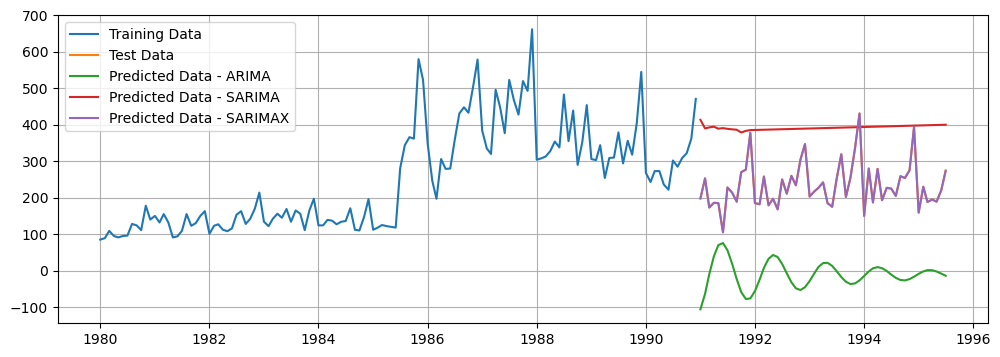

In [102]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA_shoesales,label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA_shoesales.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test.index,pred_SARIMAX_shoesales.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();